<a href="https://colab.research.google.com/github/TaliaMelikhov/DL_BackPropagation/blob/master/Copy_of_DL_Assignment_1_Talia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework assignment, you are requested to implement a full backprop algorithm using only *numpy*.

- We assume sigmoid activation across all layers.
- We assume a single value in the output layer

In [0]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

The followin class represents a simple feed forward network with multiple layers. The network class provides methods for running forward and backward for a single instance, throught the network. You should implement the methods (indicated with TODO), that performs forward and backward for an entire batch. Note, the idea is to use matrix multiplications, and not running standard loops over the instances in the batch.

In [0]:
class MyNN:
  def __init__(self, learning_rate, layer_sizes):
    '''
    learning_rate - the learning to use in backward
    layer_sizes - a list of numbers, each number repreents the nuber of neurons
                  to have in every layer. Therfore, the length of the list 
                  represents the number layers this network has.
    '''
    self.learning_rate = learning_rate
    self.layer_sizes = layer_sizes
    self.model_params = {}
    self.memory = {}
    self.grads = {}
    
    # Initializing weights
    for layer_index in range(len(layer_sizes) - 1):
      W_input = layer_sizes[layer_index + 1]
      W_output = layer_sizes[layer_index]
      self.model_params['W_' + str(layer_index + 1)] = np.random.randn(W_input, W_output) * 0.1
      self.model_params['b_' + str(layer_index + 1)] = np.random.randn(W_input) * 0.1
      
      
  def forward_single_instance(self, x):    
    a_i_1 = x
    self.memory['a_0'] = x
    for layer_index in range(len(self.layer_sizes) - 1):
      W_i = self.model_params['W_' + str(layer_index + 1)]
      b_i = self.model_params['b_' + str(layer_index + 1)]
      z_i = np.dot(W_i, a_i_1) + b_i
      a_i = 1/(1+np.exp(-z_i))
      self.memory['a_' + str(layer_index + 1)] = a_i
      a_i_1 = a_i
    return a_i_1
  
  
  def log_loss(y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    cost = -y[0]*np.log(y_hat[0]) - (1 - y[0])*np.log(1 - y_hat[0])
    return cost
  
  
  def backward_single_instance(self, y):
    a_output = self.memory['a_' + str(len(self.layer_sizes) - 1)]
    dz = a_output - y
     
    for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
      print(layer_index)
      a_l_1 = self.memory['a_' + str(layer_index - 1)]
      dW = np.dot(dz.reshape(-1, 1), a_l_1.reshape(1, -1))
      self.grads['dW_' + str(layer_index)] = dW
      W_l = self.model_params['W_' + str(layer_index)]
      dz = (a_l_1 * (1 - a_l_1)).reshape(-1, 1) * np.dot(W_l.T, dz.reshape(-1, 1))
      db = dz # TODO: - DONE 
      self.grads['db_' + str(layer_index)] = db # TODO: - DONE
  
  # TODO: update weights with grads
  def update(self):  # TODO: - DONE
     for layer_index in range(len(self.layer_sizes)-1):
      self.model_params['W_' + str(layer_index + 1)] -= (self.learning_rate * self.grads['dW_' + str(layer_index + 1)])
      self.model_params['b_' + str(layer_index + 1)] -= (self.learning_rate * self.grads['db_' + str(layer_index + 1)])

  
  # TODO: implement forward for a batch X.shape = (network_input_size, number_of_instance)
  def forward_batch(self, X):
    A_i_1 = X
    self.memory['A_0'] = X
    for layer_index in range(len(self.layer_sizes) - 1):
      W_i = self.model_params['W_' + str(layer_index + 1)]
      b_i = self.model_params['b_' + str(layer_index + 1)]
      Z_i = np.dot(W_i, A_i_1) + b_i.reshape(-1,1)
      A_i = 1/(1+np.exp(-Z_i))
      self.memory['A_' + str(layer_index + 1)] = A_i
      A_i_1 = A_i
    return A_i_1


 # TODO: implement backward for a batch y.shape = (1, number_of_instance)
  def backward_batch(self, y):
    A_output = self.memory['A_' + str(len(self.layer_sizes) - 1)]
    dZ = A_output - y
    m = (y.shape[1])

    for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
      A_l_1 = self.memory['A_' + str(layer_index-1)]
      dW = (1/m)*(np.dot(dZ, A_l_1.T))
      self.grads['dW_' + str(layer_index)] = dW
      W_l = self.model_params['W_' + str(layer_index)]
      db = dZ.T.mean(0)
      self.grads['db_' + str(layer_index)] = db
      dZ = (A_l_1 * (1 - A_l_1))* np.dot(W_l.T, dZ)
  
  # TODO: implement log_loss_batch, for a batch of instances
  def log_loss_batch(self, y_hat, y):
    m = y.shape[1]
    cost =  (np.dot(y, np.log(y_hat).T) + np.dot(1 - y, np.log(1 - y_hat).T))
    return cost.sum() * (-1/m)

In [0]:
nn = MyNN(0.01, [3, 2, 1])

In [444]:
nn.model_params

{'W_1': array([[ 0.06219801,  0.16260141, -0.10947073],
        [ 0.08885953, -0.06294587, -0.05798469]]),
 'W_2': array([[-0.02580489, -0.00977151]]),
 'b_1': array([0.09305576, 0.24223814]),
 'b_2': array([-0.01521281])}

In [445]:
x = np.random.randn(3)
y = np.random.randn(1)

y_hat = nn.forward_single_instance(x)
print(y_hat)

[0.49117581]


In [446]:
nn.backward_single_instance(y)

2
1


In [0]:
def train(X, y, epochs, batch_size):
  '''
  Train procedure, please note the TODOs inside
  '''
  loss_per_epoch = []
  for e in range(1, epochs + 1):
    epoch_loss = 0
    X_s, y_s = shuffle(X.T, y.T)
    batches_X = np.array_split(X_s ,batch_size)  # TODO: - DONE
    batches_y = np.array_split(y_s, batch_size)


    for X_b, y_b in zip(batches_X, batches_y):
      y_hat = nn.forward_batch(X_b.T)
      epoch_loss += nn.log_loss_batch(y_hat, y_b.T)
      nn.backward_batch(y_b.T)
      nn.update()
    loss_per_epoch.append(epoch_loss / len(batches_X))
    print(f'Epoch {e}, loss={epoch_loss/len(batches_X)}')
  return loss_per_epoch


In [448]:
# TODO: Make sure the following network trains properly

nn = MyNN(0.001, [6, 4, 3, 1])

X = np.random.randn(6, 100)
y = np.random.randn(1, 100)
batch_size = 8
epochs = 2

train(X, y, epochs, batch_size)

Epoch 1, loss=0.7163891490657548
Epoch 2, loss=0.7074148283741255


[0.7163891490657548, 0.7074148283741255]

#TODO: train on an external dataset

Train on the Bike Sharing dataset, using the same split as in *DL Notebook 4 - logistic regression*.
Use the following features from the data:

* temp
* atemp
* hum
* windspeed
* weekday

The response variable is, like in Notebook 4, raw["success"] = raw["cnt"] > (raw["cnt"].describe()["mean"]).

The architecture of the network should be: [5, 40, 30, 10, 7, 5, 3, 1].

Use batch_size=8, and train it for 100 epochs on the train set (based on the split as requested above).

Then, plot loss per epoch.

In [0]:
drive.mount('/content/drive')

In [0]:
!ls /content/drive/My\ Drive/Bike\ Dataset/Bike-Sharing-Dataset

day.csv  hour.csv  Readme.txt


In [0]:
# loading the data

raw = pd.read_csv('/content/drive/My Drive/Bike Dataset/Bike-Sharing-Dataset/day.csv')

In [450]:
raw["cnt"].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [0]:
raw["success"] = raw["cnt"] > (raw["cnt"].describe()["mean"])

In [0]:
# NN 
batch_size = 8
epochs = 100

nn = MyNN(0.01, [5, 40, 30, 10, 7, 5, 3, 1])


In [453]:
y = raw["success"]

# split the data to train and test, using 
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X = raw[["temp", "atemp", "hum", "windspeed", "weekday"]]
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LogisticRegression()

lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Epoch 1, loss=0.6932315201799069
Epoch 2, loss=0.6931834840050924
Epoch 3, loss=0.6931285568017593
Epoch 4, loss=0.6931078541556699
Epoch 5, loss=0.6931024529928637
Epoch 6, loss=0.6930557507571
Epoch 7, loss=0.6930311900164695
Epoch 8, loss=0.6930151917029214
Epoch 9, loss=0.6930049006192178
Epoch 10, loss=0.6929699945864551
Epoch 11, loss=0.6929664255999926
Epoch 12, loss=0.6929282893096228
Epoch 13, loss=0.6929520901764913
Epoch 14, loss=0.6929342120954861
Epoch 15, loss=0.692905860284623
Epoch 16, loss=0.6928915589628805
Epoch 17, loss=0.6928779522998144
Epoch 18, loss=0.6928606633198934
Epoch 19, loss=0.6928900607107615
Epoch 20, loss=0.6928575826612368
Epoch 21, loss=0.69284770798447
Epoch 22, loss=0.6928445222605647
Epoch 23, loss=0.6928460041324798
Epoch 24, loss=0.692828722568285
Epoch 25, loss=0.6928176213482642
Epoch 26, loss=0.6928368827369983
Epoch 27, loss=0.6927978002694035
Epoch 28, loss=0.6928198985033214
Epoch 29, loss=0.6927824953983406
Epoch 30, loss=0.6927941908863

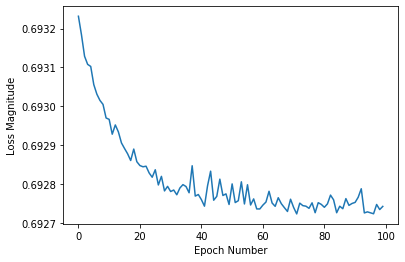

In [454]:
    X_train = np.array(X_train.T)
    X_test = np.array(X_test.T)
    y_train = np.array(y_train).reshape(1, -1)
    y_test = np.array(y_test).reshape(1, -1)
    loss_per_epoch = train(X_train, y_train, epochs, batch_size)
    plt.plot(loss_per_epoch)
    plt.xlabel('Epoch Number')
    plt.ylabel("Loss Magnitude")
    plt.show()